In [1]:
def IFPE_Regression(X_train, y_train, X_test, y_test, regressor, deg=None):
    
    ### INSTANTIATE THE MODEL

    ## LINEAR MODELS

    # ordinary least squares
    if regressor == 'linear':
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression()
    
    # ridge regression
    elif regressor == 'ridge':
        from sklearn.linear_model import Ridge
        reg = Ridge(random_state=0)

    # lasso regression
    elif regressor == 'lasso':
        from sklearn.linear_model import Lasso
        reg = Lasso(random_state=0)

    # polynomial linear regression - need to add polynomial features first
    # https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
    # https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    elif regressor == 'polynomial':
        from sklearn.linear_model import LinearRegression
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree = deg)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.fit_transform(X_test)
        X_train = X_poly_train
        X_test = X_poly_test

        # poly.fit(X_poly, y_train)
        reg = LinearRegression()

    # stochastic gradient descent
    elif regressor == 'sgd':
        from sklearn.linear_model import SGDRegressor
        reg = SGDRegressor(random_state=0)
    
    ## SUPPORT VECTOR MACHINES

    # SVM regression https://scikit-learn.org/stable/modules/svm.html#regression
    elif regressor == 'svm':
        from sklearn import svm
        reg = svm.SVR()

    ## DECISION TREES

    # decision tree
    elif regressor == 'dt':
        from sklearn import tree
        reg = tree.DecisionTreeRegressor(random_state=0)

    ## ENSEMBLE METHODS

    # random forest
    elif regressor =='rf':
        from sklearn.ensemble import RandomForestRegressor
        reg = RandomForestRegressor(max_depth=2, random_state=0)

    # gradient boost
    elif regressor =='gb':
        from sklearn.ensemble import GradientBoostingRegressor
        reg = GradientBoostingRegressor(random_state=0)

    # voting regressor
    elif regressor =='vr':
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.linear_model import LinearRegression
        from sklearn.ensemble import VotingRegressor
        reg1 = GradientBoostingRegressor(random_state=1)
        reg2 = RandomForestRegressor(random_state=1)
        reg3 = LinearRegression()
        reg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

    # xgboost
    elif regressor == 'xgb':
        import xgboost as xgb
        reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0)



    ### FIT THE MODEL

    reg.fit(X_train, y_train)




    ### PREDICT THE RESPONSE FOR THE TEST DATASET

    y_pred = reg.predict(X_test)




    ### EVALUATE THE MODEL

    # Mean Absolute Error
    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(y_test, y_pred)

    # Root Mean Square Error
    from sklearn.metrics import mean_squared_error
    RMSE = mean_squared_error(y_test, y_pred, squared=False)

    # r2
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)

    # Adjusted r2
    n = len(X_test)
    p = len(X_test[0,:])

    Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

    ### COMPARE MODELS
    
    import pandas as pd
    model_comparison = pd.DataFrame({
        'Mean Absolute Error': MAE,
        'Root Mean Square Error': RMSE,
        'R Squared': r2,
        'Adjusted R Squared': Adj_r2
    }, index  = [str(regressor)])
    
    return model_comparison

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib
pd.set_option('display.max_rows', None)

# Test

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

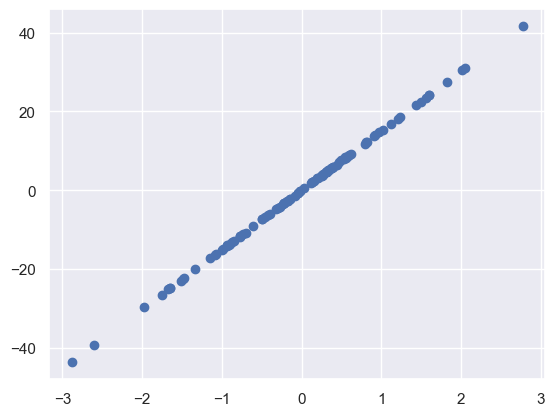

In [4]:
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
# plot regression dataset
pyplot.scatter(X,y)
pyplot.show()


In [5]:
def split_data(data, target=None, percent_test=0.3, dtype='array'):
    # Import train_test_split function
    from sklearn.model_selection import train_test_split

    # Split dataset into training set and test set
    if dtype == 'array':      
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=percent_test,random_state=10)
    
        print(f'X_train shape: {X_train.shape}')
        print(f'X_test shape: {X_test.shape}')
        print(f'y_train shape: {y_train.shape}')
        print(f'y_test shape: {y_test.shape}')
    
        return X_train, X_test, y_train, y_test
    
    if dtype == 'df':
        df_train, df_test = train_test_split(data, test_size=percent_test,random_state=10)

        print(f'df_train shape: {df_train.shape}')
        print(f'df_test shape: {df_test.shape}')
    
        return df_train, df_test

In [6]:
X_train, X_test, y_train, y_test = split_data(data=X, target=y)

X_train shape: (70, 1)
X_test shape: (30, 1)
y_train shape: (70,)
y_test shape: (30,)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model_comparison_linear = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,0.094181,0.124682,0.999931,0.999928


In [11]:

model_comparison_ridge = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,0.170627,0.235372,0.999754,0.999745


In [12]:
model_comparison_lasso = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,0.773287,0.992369,0.995621,0.995465


In [13]:
model_comparison_poly2 = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,0.093801,0.124337,0.999931,0.999923


In [14]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,0.093506,0.124019,0.999932,0.999921


In [15]:
model_comparison_sgd = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,0.104476,0.13421,0.99992,0.999917


In [16]:
model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
model_comparison_svm

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
svm,4.131387,8.861258,0.650841,0.638371


In [17]:
model_comparison_dt = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,0.765486,1.266482,0.992868,0.992613


In [18]:
model_comparison_rf = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,2.449235,3.424274,0.94786,0.945998


In [19]:
model_comparison_gb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,0.765332,1.266041,0.992873,0.992618


In [20]:
model_comparison_vr = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,0.40851,0.630533,0.998232,0.998169


In [21]:
model_comparison_xgb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,0.765321,1.265948,0.992874,0.992619


In [22]:
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [23]:
test = model_comparison.sort_values('R Squared', ascending=False)
test

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,0.093506,0.124019,0.999932,0.999921
polynomial,0.093801,0.124337,0.999931,0.999923
linear,0.094181,0.124682,0.999931,0.999928
sgd,0.104476,0.134210,0.999920,0.999917
ridge,0.170627,0.235372,0.999754,0.999745
vr,0.408510,0.630533,0.998232,0.998169
lasso,0.773287,0.992369,0.995621,0.995465
xgb,0.765321,1.265948,0.992874,0.992619
gb,0.765332,1.266041,0.992873,0.992618
dt,0.765486,1.266482,0.992868,0.992613


# Iteration 1

In [24]:
import pickle

with open('iteration1.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [25]:
df_flights.head()

,arr_delay,season_Fall,season_Spring,season_Summer,season_Winter
0,19.0,0,0,0,1
1,46.0,0,0,0,1
2,-9.0,0,0,0,1
3,-3.0,0,0,0,1
4,37.0,0,0,0,1


In [26]:
X = df_flights.drop('arr_delay',axis=1).to_numpy()
y = df_flights['arr_delay'].to_numpy()

In [27]:
def split_data(data, target=None, percent_test=0.3, dtype='array'):
    # Import train_test_split function
    from sklearn.model_selection import train_test_split

    # Split dataset into training set and test set
    if dtype == 'array':      
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=percent_test,random_state=10)
    
        print(f'X_train shape: {X_train.shape}')
        print(f'X_test shape: {X_test.shape}')
        print(f'y_train shape: {y_train.shape}')
        print(f'y_test shape: {y_test.shape}')
    
        return X_train, X_test, y_train, y_test
    
    if dtype == 'df':
        df_train, df_test = train_test_split(data, test_size=percent_test,random_state=10)

        print(f'df_train shape: {df_train.shape}')
        print(f'df_test shape: {df_test.shape}')
    
        return df_train, df_test

In [28]:
X_train, X_test, y_train, y_test = split_data(data=X, target=y)

X_train shape: (65186, 4)
X_test shape: (27937, 4)
y_train shape: (65186,)
y_test shape: (27937,)


In [29]:
model_comparison_linear = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,18.483872,27.830069,0.003057,0.002914


In [30]:
model_comparison_ridge = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,18.484614,27.830188,0.003048,0.002905


In [31]:
model_comparison_lasso = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,18.491265,27.872768,-0.000005,-0.000148


In [32]:
model_comparison_poly2 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,18.484214,27.830056,0.003057,0.002522


In [33]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,18.484221,27.830056,0.003057,0.001807


In [34]:
model_comparison_sgd = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,18.440142,27.831247,0.002972,0.002829


In [35]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [36]:
model_comparison_dt = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,18.484617,27.830189,0.003048,0.002905


In [37]:
model_comparison_rf = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,18.485452,27.830672,0.003013,0.002871


In [38]:
model_comparison_gb = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,18.484616,27.830189,0.003048,0.002905


In [39]:
model_comparison_vr = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,18.483587,27.830115,0.003053,0.00291


In [40]:
model_comparison_xgb = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,18.484617,27.830189,0.003048,0.002905


In [41]:
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [42]:
model_comparison.sort_values('R Squared', ascending=False)

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,18.484214,27.830056,0.003057,0.002522
polynomial,18.484221,27.830056,0.003057,0.001807
linear,18.483872,27.830069,0.003057,0.002914
vr,18.483587,27.830115,0.003053,0.002910
ridge,18.484614,27.830188,0.003048,0.002905
gb,18.484616,27.830189,0.003048,0.002905
xgb,18.484617,27.830189,0.003048,0.002905
dt,18.484617,27.830189,0.003048,0.002905
rf,18.485452,27.830672,0.003013,0.002871
sgd,18.440142,27.831247,0.002972,0.002829


# Iteration 2

In [45]:
import pickle

with open('iteration2.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [46]:
df_flights.head()

,arr_delay,season_Fall,season_Spring,season_Summer,season_Winter,crs_dep_time_of_day_early morning,crs_dep_time_of_day_late morning,crs_dep_time_of_day_midday,crs_dep_time_of_day_late afternoon,crs_dep_time_of_day_evening
0,19.0,0,0,0,1,0,0,0,1,0
1,46.0,0,0,0,1,0,0,0,0,1
2,-9.0,0,0,0,1,0,1,0,0,0
3,-3.0,0,0,0,1,0,1,0,0,0
4,37.0,0,0,0,1,0,0,0,1,0


In [47]:
X = df_flights.drop('arr_delay',axis=1).to_numpy()
y = df_flights['arr_delay'].to_numpy()

In [48]:
def split_data(data, target=None, percent_test=0.3, dtype='array'):
    # Import train_test_split function
    from sklearn.model_selection import train_test_split

    # Split dataset into training set and test set
    if dtype == 'array':      
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=percent_test,random_state=10)
    
        print(f'X_train shape: {X_train.shape}')
        print(f'X_test shape: {X_test.shape}')
        print(f'y_train shape: {y_train.shape}')
        print(f'y_test shape: {y_test.shape}')
    
        return X_train, X_test, y_train, y_test
    
    if dtype == 'df':
        df_train, df_test = train_test_split(data, test_size=percent_test,random_state=10)

        print(f'df_train shape: {df_train.shape}')
        print(f'df_test shape: {df_test.shape}')
    
        return df_train, df_test

In [49]:
X_train, X_test, y_train, y_test = split_data(data=X, target=y)

X_train shape: (65186, 9)
X_test shape: (27937, 9)
y_train shape: (65186,)
y_test shape: (27937,)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [51]:
scaler.fit(X_train)

StandardScaler()

In [52]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=df_flights.drop('arr_delay',axis=1).columns)

In [54]:
X_train_scaled_df.head()

,season_Fall,season_Spring,season_Summer,season_Winter,crs_dep_time_of_day_early morning,crs_dep_time_of_day_late morning,crs_dep_time_of_day_midday,crs_dep_time_of_day_late afternoon,crs_dep_time_of_day_evening
0,-0.587164,-0.572780,1.681047,-0.554585,-0.163045,1.419780,-0.663422,-0.625957,-0.24213
1,1.703100,-0.572780,-0.594867,-0.554585,-0.163045,-0.704334,-0.663422,1.597553,-0.24213
2,-0.587164,1.745871,-0.594867,-0.554585,-0.163045,-0.704334,-0.663422,1.597553,-0.24213
3,-0.587164,1.745871,-0.594867,-0.554585,-0.163045,1.419780,-0.663422,-0.625957,-0.24213
4,-0.587164,-0.572780,-0.594867,1.803151,-0.163045,1.419780,-0.663422,-0.625957,-0.24213


In [55]:
model_comparison_linear = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,18.339916,27.601299,0.019379,0.019063


In [56]:
model_comparison_ridge = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,18.341577,27.601991,0.01933,0.019014


In [57]:
model_comparison_lasso = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,18.34605,27.665254,0.01483,0.014512


In [58]:
model_comparison_poly2 = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,18.312436,27.586304,0.020445,0.018512


In [59]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,18.319485,27.587014,0.020394,0.012618


In [60]:
model_comparison_sgd = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,18.211465,27.618035,0.01819,0.017873


In [61]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [62]:
model_comparison_dt = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,18.317469,27.586332,0.020443,0.020127


In [63]:
model_comparison_rf = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,18.362236,27.651312,0.015823,0.015505


In [64]:
model_comparison_gb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,18.317293,27.585999,0.020466,0.020151


In [65]:
model_comparison_vr = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,18.31885,27.585712,0.020487,0.020171


In [66]:
model_comparison_xgb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,18.317469,27.586331,0.020443,0.020127


In [67]:
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [68]:
iteration2 = model_comparison.sort_values('R Squared', ascending=False)
iteration2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,18.318850,27.585712,0.020487,0.020171
gb,18.317293,27.585999,0.020466,0.020151
polynomial,18.312436,27.586304,0.020445,0.018512
xgb,18.317469,27.586331,0.020443,0.020127
dt,18.317469,27.586332,0.020443,0.020127
polynomial,18.319485,27.587014,0.020394,0.012618
linear,18.339916,27.601299,0.019379,0.019063
ridge,18.341577,27.601991,0.019330,0.019014
sgd,18.211465,27.618035,0.018190,0.017873
rf,18.362236,27.651312,0.015823,0.015505


# Iteration 3

In [69]:
import pickle

with open('iteration3.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [70]:
df_flights.head()

,arr_delay,season_Fall,season_Spring,season_Summer,season_Winter,crs_dep_time_of_day_early morning,crs_dep_time_of_day_late morning,crs_dep_time_of_day_midday,crs_dep_time_of_day_late afternoon,crs_dep_time_of_day_evening,crs_arr_time_of_day_early morning,crs_arr_time_of_day_late morning,crs_arr_time_of_day_midday,crs_arr_time_of_day_late afternoon,crs_arr_time_of_day_evening
0,19.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,46.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,-9.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,-3.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,37.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [71]:
X = df_flights.drop('arr_delay',axis=1).to_numpy()
y = df_flights['arr_delay'].to_numpy()

In [72]:
def split_data(data, target=None, percent_test=0.3, dtype='array'):
    # Import train_test_split function
    from sklearn.model_selection import train_test_split

    # Split dataset into training set and test set
    if dtype == 'array':      
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=percent_test,random_state=10)
    
        print(f'X_train shape: {X_train.shape}')
        print(f'X_test shape: {X_test.shape}')
        print(f'y_train shape: {y_train.shape}')
        print(f'y_test shape: {y_test.shape}')
    
        return X_train, X_test, y_train, y_test
    
    if dtype == 'df':
        df_train, df_test = train_test_split(data, test_size=percent_test,random_state=10)

        print(f'df_train shape: {df_train.shape}')
        print(f'df_test shape: {df_test.shape}')
    
        return df_train, df_test

In [73]:
X_train, X_test, y_train, y_test = split_data(data=X, target=y)

X_train shape: (65186, 14)
X_test shape: (27937, 14)
y_train shape: (65186,)
y_test shape: (27937,)


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [75]:
scaler.fit(X_train)

StandardScaler()

In [76]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=df_flights.drop('arr_delay',axis=1).columns)

In [78]:
X_train_scaled_df.head()

,season_Fall,season_Spring,season_Summer,season_Winter,crs_dep_time_of_day_early morning,crs_dep_time_of_day_late morning,crs_dep_time_of_day_midday,crs_dep_time_of_day_late afternoon,crs_dep_time_of_day_evening,crs_arr_time_of_day_early morning,crs_arr_time_of_day_late morning,crs_arr_time_of_day_midday,crs_arr_time_of_day_late afternoon,crs_arr_time_of_day_evening
0,-0.587164,-0.572780,1.681047,-0.554585,-0.163045,1.419780,-0.663422,-0.625957,-0.24213,-0.118121,1.847460,-0.661600,-0.661552,-0.421349
1,1.703100,-0.572780,-0.594867,-0.554585,-0.163045,-0.704334,-0.663422,1.597553,-0.24213,-0.118121,-0.541284,-0.661600,1.511596,-0.421349
2,-0.587164,1.745871,-0.594867,-0.554585,-0.163045,-0.704334,-0.663422,1.597553,-0.24213,-0.118121,-0.541284,-0.661600,1.511596,-0.421349
3,-0.587164,1.745871,-0.594867,-0.554585,-0.163045,1.419780,-0.663422,-0.625957,-0.24213,-0.118121,-0.541284,-0.661600,1.511596,-0.421349
4,-0.587164,-0.572780,-0.594867,1.803151,-0.163045,1.419780,-0.663422,-0.625957,-0.24213,-0.118121,-0.541284,1.511486,-0.661552,-0.421349


<AxesSubplot: >

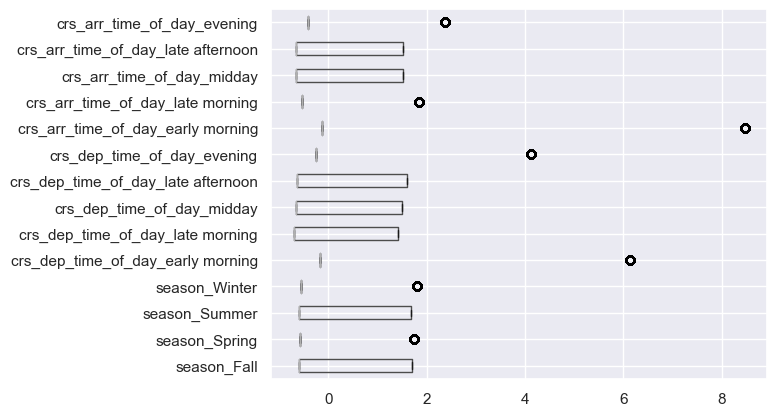

In [79]:
X_train_scaled_df.boxplot(vert=False)

In [80]:
model_comparison_linear = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,18.329323,27.585897,0.020474,0.019982


In [81]:
model_comparison_ridge = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,18.330523,27.586088,0.02046,0.019969


In [82]:
model_comparison_lasso = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,18.339888,27.653532,0.015664,0.015171


In [83]:
model_comparison_poly2 = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,3.096295e+07,3.659459e+09,-1.723756e+16,-1.731192e+16


In [84]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,1.514631e+09,1.803042e+11,-4.184595e+19,-4.288995e+19


In [85]:
model_comparison_sgd = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,18.383102,27.608625,0.018859,0.018367


In [86]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [87]:
model_comparison_dt = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,18.328404,27.594127,0.019889,0.019398


In [88]:
model_comparison_rf = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,18.3584,27.642981,0.016415,0.015922


In [89]:
model_comparison_gb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,18.310484,27.573575,0.021348,0.020858


In [90]:
model_comparison_vr = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,18.31278,27.57345,0.021357,0.020867


In [91]:
model_comparison_xgb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,18.328412,27.594132,0.019889,0.019397


In [92]:
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [93]:
iteration3 = model_comparison.sort_values('R Squared', ascending=False)
iteration3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,1.831278e+01,2.757345e+01,2.135729e-02,2.086660e-02
gb,1.831048e+01,2.757357e+01,2.134842e-02,2.085772e-02
linear,1.832932e+01,2.758590e+01,2.047352e-02,1.998239e-02
ridge,1.833052e+01,2.758609e+01,2.045997e-02,1.996883e-02
dt,1.832840e+01,2.759413e+01,1.988896e-02,1.939754e-02
xgb,1.832841e+01,2.759413e+01,1.988863e-02,1.939721e-02
sgd,1.838310e+01,2.760863e+01,1.885878e-02,1.836683e-02
rf,1.835840e+01,2.764298e+01,1.641543e-02,1.592227e-02
lasso,1.833989e+01,2.765353e+01,1.566445e-02,1.517091e-02
polynomial,3.096295e+07,3.659459e+09,-1.723756e+16,-1.731192e+16


# Iteration 4

In [94]:
import pickle

with open('iteration4.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [95]:
df_flights.head()

,arr_delay,season_Fall,season_Spring,season_Summer,season_Winter,crs_dep_time_of_day_early morning,crs_dep_time_of_day_late morning,crs_dep_time_of_day_midday,crs_dep_time_of_day_late afternoon,crs_dep_time_of_day_evening,crs_arr_time_of_day_early morning,crs_arr_time_of_day_late morning,crs_arr_time_of_day_midday,crs_arr_time_of_day_late afternoon,crs_arr_time_of_day_evening,origin_region_Midwest,origin_region_Northeast,origin_region_Other,origin_region_South,origin_region_West
0,19.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,46.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,-9.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,-3.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,37.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [96]:
X = df_flights.drop('arr_delay',axis=1).to_numpy()
y = df_flights['arr_delay'].to_numpy()

In [97]:
def split_data(data, target=None, percent_test=0.3, dtype='array'):
    # Import train_test_split function
    from sklearn.model_selection import train_test_split

    # Split dataset into training set and test set
    if dtype == 'array':      
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=percent_test,random_state=10)
    
        print(f'X_train shape: {X_train.shape}')
        print(f'X_test shape: {X_test.shape}')
        print(f'y_train shape: {y_train.shape}')
        print(f'y_test shape: {y_test.shape}')
    
        return X_train, X_test, y_train, y_test
    
    if dtype == 'df':
        df_train, df_test = train_test_split(data, test_size=percent_test,random_state=10)

        print(f'df_train shape: {df_train.shape}')
        print(f'df_test shape: {df_test.shape}')
    
        return df_train, df_test

In [98]:
X_train, X_test, y_train, y_test = split_data(data=X, target=y)

X_train shape: (65186, 19)
X_test shape: (27937, 19)
y_train shape: (65186,)
y_test shape: (27937,)


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [100]:
scaler.fit(X_train)

StandardScaler()

In [101]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=df_flights.drop('arr_delay',axis=1).columns)

In [103]:
X_train_scaled_df.head()

,season_Fall,season_Spring,season_Summer,season_Winter,crs_dep_time_of_day_early morning,crs_dep_time_of_day_late morning,crs_dep_time_of_day_midday,crs_dep_time_of_day_late afternoon,crs_dep_time_of_day_evening,crs_arr_time_of_day_early morning,crs_arr_time_of_day_late morning,crs_arr_time_of_day_midday,crs_arr_time_of_day_late afternoon,crs_arr_time_of_day_evening,origin_region_Midwest,origin_region_Northeast,origin_region_Other,origin_region_South,origin_region_West
0,-0.587164,-0.572780,1.681047,-0.554585,-0.163045,1.419780,-0.663422,-0.625957,-0.24213,-0.118121,1.847460,-0.661600,-0.661552,-0.421349,-0.492337,-0.382925,-0.074417,1.229431,-0.613320
1,1.703100,-0.572780,-0.594867,-0.554585,-0.163045,-0.704334,-0.663422,1.597553,-0.24213,-0.118121,-0.541284,-0.661600,1.511596,-0.421349,-0.492337,-0.382925,-0.074417,1.229431,-0.613320
2,-0.587164,1.745871,-0.594867,-0.554585,-0.163045,-0.704334,-0.663422,1.597553,-0.24213,-0.118121,-0.541284,-0.661600,1.511596,-0.421349,-0.492337,-0.382925,-0.074417,1.229431,-0.613320
3,-0.587164,1.745871,-0.594867,-0.554585,-0.163045,1.419780,-0.663422,-0.625957,-0.24213,-0.118121,-0.541284,-0.661600,1.511596,-0.421349,-0.492337,-0.382925,-0.074417,-0.813384,1.630471
4,-0.587164,-0.572780,-0.594867,1.803151,-0.163045,1.419780,-0.663422,-0.625957,-0.24213,-0.118121,-0.541284,1.511486,-0.661552,-0.421349,-0.492337,-0.382925,-0.074417,-0.813384,1.630471


<AxesSubplot: >

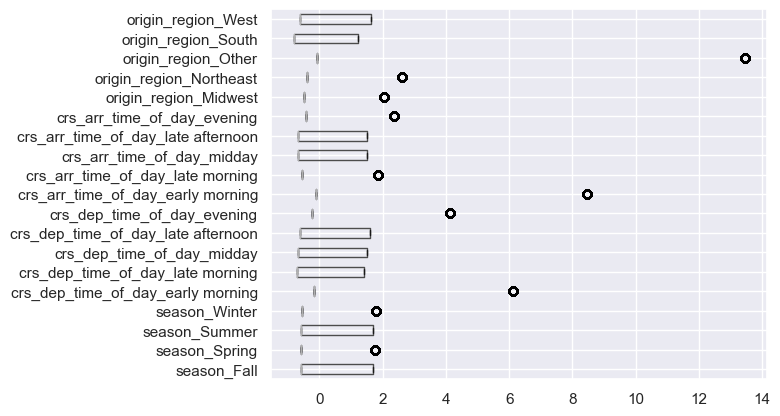

In [104]:
X_train_scaled_df.boxplot(vert=False)

In [105]:
model_comparison_linear = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,18.330863,27.582008,0.02075,0.020083


In [106]:
model_comparison_ridge = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,18.33248,27.583598,0.020637,0.01997


In [107]:
model_comparison_lasso = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,18.339888,27.653532,0.015664,0.014995


In [108]:
model_comparison_poly2 = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,2.410419e+09,2.848836e+11,-1.044665e+20,-1.052577e+20


In [109]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,4.560674e+09,5.231494e+11,-3.522844e+20,-3.728374e+20


In [110]:
model_comparison_sgd = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,18.333194,27.619603,0.018078,0.01741


In [111]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [112]:
model_comparison_dt = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,18.34606,27.62178,0.017924,0.017255


In [113]:
model_comparison_rf = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,18.356969,27.643086,0.016408,0.015739


In [114]:
model_comparison_gb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,18.300381,27.561269,0.022222,0.021556


In [115]:
model_comparison_vr = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,18.306838,27.563535,0.022061,0.021395


In [116]:
model_comparison_xgb = IFPE_Regression(X_train_scaled, y_train, X_test_scaled, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,18.345715,27.621898,0.017915,0.017247


In [117]:
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [118]:
iteration4 = model_comparison.sort_values('R Squared', ascending=False)
iteration4

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,1.830038e+01,2.756127e+01,2.222177e-02,2.155631e-02
vr,1.830684e+01,2.756354e+01,2.206095e-02,2.139537e-02
linear,1.833086e+01,2.758201e+01,2.074973e-02,2.008326e-02
ridge,1.833248e+01,2.758360e+01,2.063678e-02,1.997023e-02
sgd,1.833319e+01,2.761960e+01,1.807840e-02,1.741012e-02
dt,1.834606e+01,2.762178e+01,1.792356e-02,1.725517e-02
xgb,1.834572e+01,2.762190e+01,1.791521e-02,1.724681e-02
rf,1.835697e+01,2.764309e+01,1.640800e-02,1.573857e-02
lasso,1.833989e+01,2.765353e+01,1.566445e-02,1.499452e-02
polynomial,2.410419e+09,2.848836e+11,-1.044665e+20,-1.052577e+20
